## Implementation of rate distortion encoder by random code

In the class `rate_distortion_code` we store the codebook, which contains `M` codewords of length `n`.

Quantization is done by nearest-neigbor encoding. Given an input sequence, the encoder find the closest codewords in the codebook and return the closest sequence. Tie is broken arbitrarily.

The source symbols are generated independently and uniformly from {0,1}. The rate distortion function for this source model is
$$
R_I(D) = 1- h_2(D)  \text{ for } 0\leq D \leq 0.5
$$

In [1]:
# Random coding for rate distortion

from random import shuffle,randint

# Hamming distance between two sequences
def Hamming_distance(u,v):
    return sum([0 if x==y else 1 for (x,y) in zip(u,v)])

# a codeword has `n/2` ones and `n/2` zeros, randomly shuffled.
def random_codeword(n):
    new_seq = [0 for _ in range(int(n/2))]+[1 for _ in range(int(n/2))]
    shuffle(new_seq)
    return new_seq

# Generaet a random bit sequence uniformly
def random_sequence(n):
    return [randint(0,1) for _ in range(n)]

# Data structure for rate distortion code
class rate_distortion_code():
    def __init__(self, n, M):
      # generate codebook 
      self.M = M
      self.codebook = []
      for _ in range(M):
          self.codebook.append(random_codeword(n))

    def quantize(self,test_seq):
        # Find the nearest codeword to `test_seq`
        distances = [Hamming_distance(test_seq,x) for x in self.codebook]
        min_value = min(distances)
        m = distances.index(min_value)
        return min_value, m # return the distortion and the index of the cloest codeword

Evaluate the randomly generated code by simulation
Estimate the distortion by Monte Carlo

In [2]:
from numpy import log2

n = 50   # block length
M = 1000    # number of codeword

# Instantiate a rate distortion code by creating `M` random codewords. 
# Each codeword contains n/2 zeros and n/2 ones.
RD = rate_distortion_code(n,M) 

iteration = 5000   # Estimate the average distortion by generating `iteration` input sequences

# estimate distortion by randomly generating bit sequences and 
# calculate Hamming distance after  quantization
total_distortion = 0
for _ in range(iteration):
    test_seq = random_sequence(n)
    d, index = RD.quantize(test_seq)
#    print(f"Input sequence: {test_seq}")
#    print(f"Quantized to  : {RD.codebook[index]}")
#    print(f"Distance = {d}")
    total_distortion += d
    
print(f"Average distortion = {total_distortion/(iteration*n):0.4}")
print(f"Rate = {log2(M)/n:0.4}")

Average distortion = 0.2773
Rate = 0.1993


Plot the rate distortion pair (R,D) together with the information rate distortion function.
The point obtained by simulation should lie above the curve.
Closer to the curve means close to the fundamental optimum.

Code length = 50
Number of codewords = 1000
Code rate = 0.1993
Estimated distortion normalized by block length = 0.2773


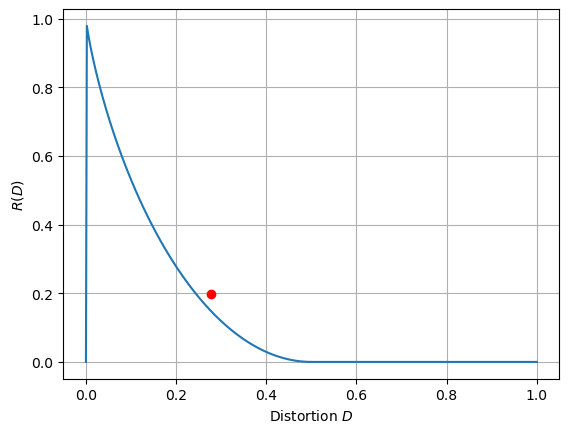

In [3]:
from numpy import linspace, log2
import matplotlib.pyplot as plt

P = 0.5

def h2(p):   # binary entropy function
  return -p*log2(p) - (1-p)*log2(1-p)

def R(x):
    if x>0 and x<P:
        return h2(P)-h2(x)
    else:
        return 0
    
xs = linspace(0,1,500)
ys = [R(x) for x in xs]
plt.plot(xs,ys)
plt.plot(total_distortion/(iteration*n), log2(M)/n,'ro')
plt.xlabel('Distortion $D$')
plt.ylabel("$R(D)$")
plt.grid()

print(f"Code length = {n}")
print(f"Number of codewords = {M}")
print(f"Code rate = {log2(M)/n:0.4}")
print(f"Estimated distortion normalized by block length = {total_distortion/(iteration*n):0.4}")

You can vary the code parameters to see the difference.